#### Cultural Data Science 
# Assignment 2 



### Part I.

In [1]:
# Lets load our libraries first 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Lets Load our data 
data1 = pd.read_csv('divorce_margarine.csv')

In [10]:
# Lets explore the data 
data1.head(5)

,Unnamed: 0,divorce_rate_maine,margarine_consumption_per_capita,year
0,1,5.0,8.2,2000
1,2,4.7,7.0,2001
2,3,4.6,6.5,2002
3,4,4.4,5.3,2003
4,5,4.3,5.2,2004


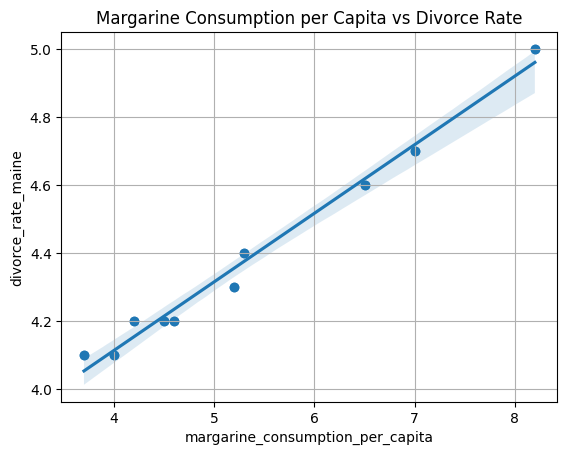

In [26]:
# Lets plot the divorce rates against the margarine consumption 
plt.scatter(data1['margarine_consumption_per_capita'], data1['divorce_rate_maine'])
# Lets add labels to x and y axis
plt.xlabel('Margarine Consumption per Capita')
plt.ylabel('Divorce Rate')
# Add a grid to the plot
plt.grid()
# add a trendline to the plot
sns.regplot(x=data1['margarine_consumption_per_capita'], y=data1['divorce_rate_maine'], data=data1)
# Lets add a title to the plot
plt.title('Margarine Consumption per Capita vs Divorce Rate')

# save this plot as a variable p 
p = plt.show()


In [35]:
# Lets calculate the correlation between the two variables
correlation = data1['margarine_consumption_per_capita'].corr(data1['divorce_rate_maine'])
print(correlation)

0.9925584582238187


<Axes: >

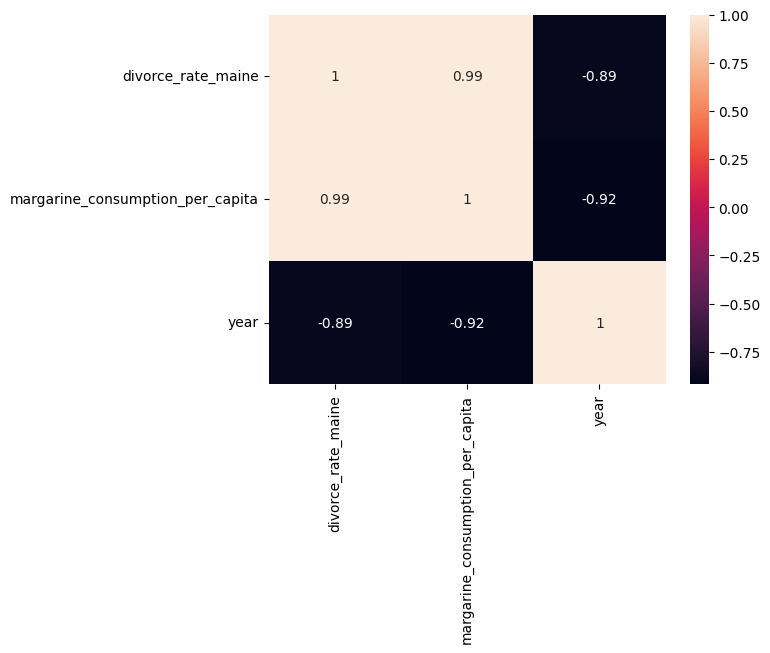

In [32]:
# we can also visualize a correlation matrix for all the variables in the dataset
sns.heatmap(data1.corr(), annot=True)


### Part II.

2.Load the ‘GSSvocab’dataset from the ‘car’ package. 

This dataset contains people’s scores on an English vocabulary test and includes demographic information.

Filter for the year 1978 and remove rows with missing values (the function na.exclude()is one way to do this–check out the documentation!).

Is a person’s  score on the vocabulary test  (‘vocab’) significantly impacted by their level  of education (‘educ’)?
Visualize the relationship in a plot and build a model. Briefly explain the results.

Whether a person is thenative of an English-speaking country(‘nativeBorn’) could potentially have an impact on the size of their vocabulary.
Visualize the relationship and add the predictor to the model. Briefly explain the results.

Does  a  person’s  level  of  education  depend  on  whether they  are  a  native  of  the  country?
Visualize the relationship. Do you think it makes sense to add the relationship as an interaction term?
Try creating the model and briefly explain the results. 
Which model performs best? 
When creating plots, try to play around with the options of ggplot2–add titlesand axis labels, and consider using colours.

In [36]:
# Lets load the second dataset 
data2 = pd.read_csv('dss_vocab.csv')

In [38]:
# remove the column Unnamed: 0
data2 = data2.drop('Unnamed: 0', axis=1)

In [41]:
# now take only the rows with year 1978
data2_1978 = data2[data2['year'] == 1978]
# and remove the rows with missing values
data2_1978 = data2_1978.dropna()

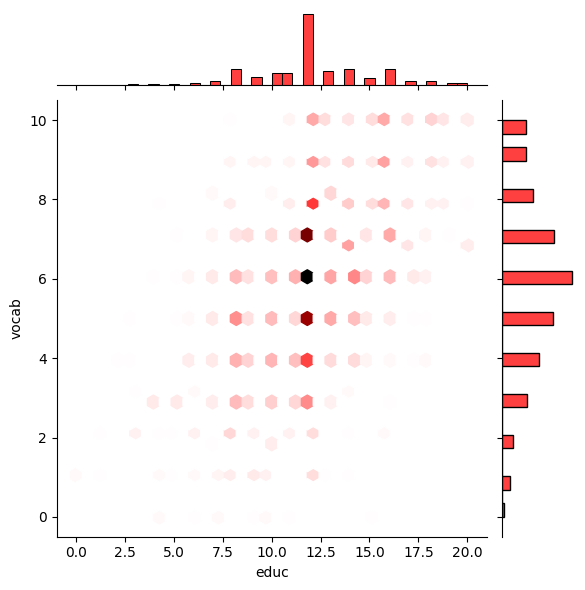

In [58]:
# now visualize this as a histogram on x axis and y axis 
sns.jointplot(x=data2_1978['educ'], y=data2_1978['vocab'], kind='hex', color='red')

In [67]:
import statsmodels.api as sm

# Lets fit the general linear model from statsmodels
X = data2_1978['educ']
y = data2_1978['vocab']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  vocab   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     597.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          4.58e-111
Time:                        15:26:57   Log-Likelihood:                -3031.2
No. Observations:                1477   AIC:                             6066.
Df Residuals:                    1475   BIC:                             6077.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2357      0.200      6.192      0.000       0.844       1.627
educ           0.3925      0.016     24.443      0.000       0.361       0.424
==============================================================================
Omnibus:                        3.327   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                3.231
Skew:                          -0.111   Prob(JB):                        0.199
Kurtosis:                       3.058   Cond. No.                         50.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='vocab', ylabel='Density'>

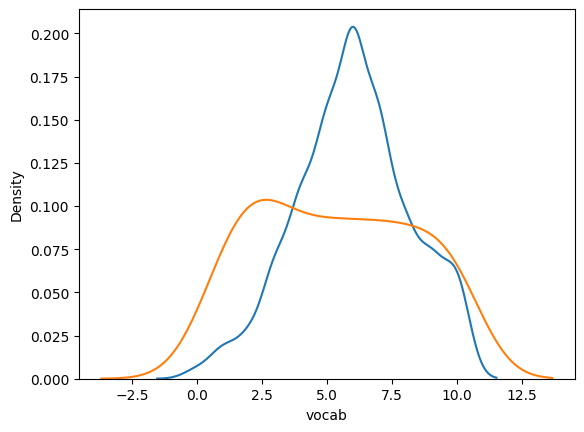

In [93]:
# now lets compare the distributions of vocab for nativeBorn yes and nativeBorn no
vocab_nativeBorn_yes = data2_1978[data2_1978['nativeBorn'] == 'yes']['vocab']
vocab_nativeBorn_no = data2_1978[data2_1978['nativeBorn'] == 'no']['vocab']

#sns.histplot(vocab_nativeBorn_yes,bins=20, kde=True, label='Native Born Yes')
#sns.histplot(vocab_nativeBorn_no,bins=20, kde=True, label='Native Born No')

# And visualize the probability density function for the two distributions
sns.kdeplot(vocab_nativeBorn_yes, label='Native Born Yes')
sns.kdeplot(vocab_nativeBorn_no, label='Native Born No')

In [96]:
# Convert the nativeBorn column to a binary variable
data2_1978['nativeBorn'] = data2_1978['nativeBorn'].map({'yes': 1, 'no': 0})

# Let's reuse our previous model code but add another predictor 
X = data2_1978[['educ', 'nativeBorn']]
y = data2_1978['vocab']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  vocab   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     305.6
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          9.57e-112
Time:                        16:10:24   Log-Likelihood:                -3026.2
No. Observations:                1477   AIC:                             6058.
Df Residuals:                    1474   BIC:                             6074.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6280      0.277      2.271      0.023       0.086       1.170
educ           0.3922      0.016     24.499      0.000       0.361       0.424
nativeBorn     0.6503      0.206      3.164      0.002       0.247       1.053
==============================================================================
Omnibus:                        0.719   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.698   Jarque-Bera (JB):                0.707
Skew:                          -0.054   Prob(JB):                        0.702
Kurtosis:                       2.998   Cond. No.                         81.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""